<a href="https://www.kaggle.com/code/wandererfakeer/03-matplotlib-visualization-example?scriptVersionId=190870907" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
dataf = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

dataf.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [3]:
dataf.dropna(subset = ["salary_year_avg"], inplace = True)

In [4]:
year_count = dataf.job_posted_date.value_counts().sort_index()

year_count

job_posted_date
2023-01-01 00:02:56    1
2023-01-01 00:06:13    1
2023-01-01 00:17:55    1
2023-01-01 00:17:58    1
2023-01-01 00:21:09    1
                      ..
2023-12-31 15:00:46    1
2023-12-31 16:00:07    1
2023-12-31 17:31:57    1
2023-12-31 23:40:22    1
2023-12-31 23:40:32    1
Name: count, Length: 21661, dtype: int64

In [5]:
type(year_count)

pandas.core.series.Series

In [6]:
dataf["job_posted_date"] = pd.to_datetime(dataf.job_posted_date)

dataf["job_posted_month"] = dataf.job_posted_date.dt.month

dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22003 entries, 28 to 785692
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        22003 non-null  object        
 1   job_title              22003 non-null  object        
 2   job_location           21723 non-null  object        
 3   job_via                22003 non-null  object        
 4   job_schedule_type      21987 non-null  object        
 5   job_work_from_home     22003 non-null  bool          
 6   search_location        22003 non-null  object        
 7   job_posted_date        22003 non-null  datetime64[ns]
 8   job_no_degree_mention  22003 non-null  bool          
 9   job_health_insurance   22003 non-null  bool          
 10  job_country            22003 non-null  object        
 11  salary_rate            22003 non-null  object        
 12  salary_year_avg        22003 non-null  float64       
 13  sala

In [7]:
dataf.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",8
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",6
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2


In [8]:
month = dataf.job_posted_month.value_counts()

month = month.sort_index()

month

job_posted_month
1     2296
2     2010
3     2204
4     1876
5     1911
6     2331
7     2219
8     2095
9     1246
10    1310
11    1124
12    1381
Name: count, dtype: int64

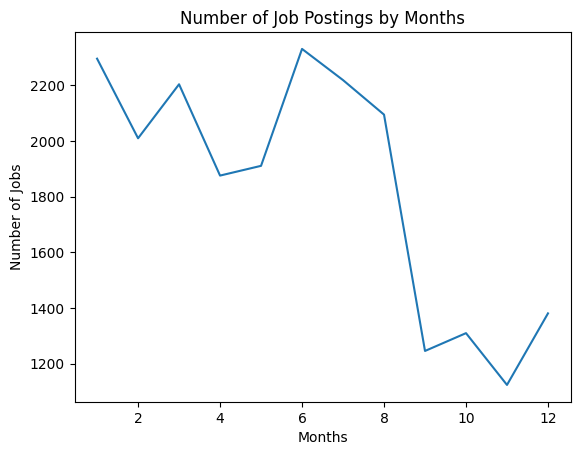

In [9]:
plt.plot(month.index, month)

plt.title("Number of Job Postings by Months")

plt.xlabel("Months")

plt.ylabel("Number of Jobs")

plt.show()

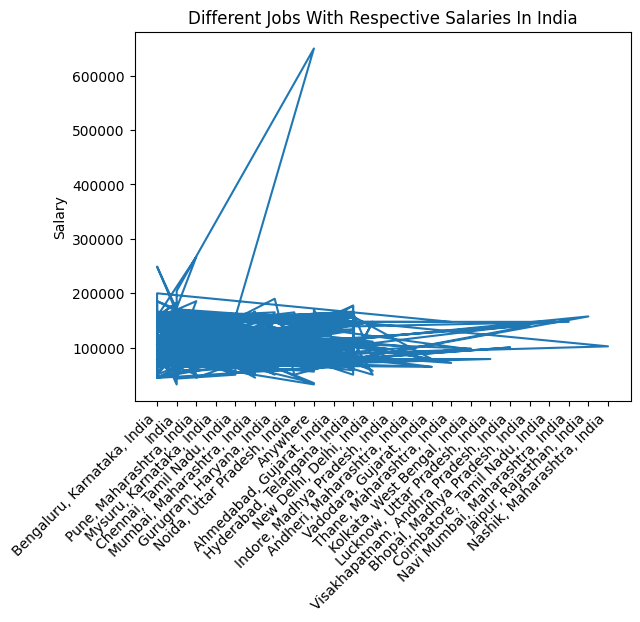

In [10]:
country_india = dataf[(dataf.job_country) == "India"]

plt.plot(country_india.job_location, country_india.salary_year_avg)

plt.title("Different Jobs With Respective Salaries In India")

plt.xticks(rotation = 45, ha = "right")

plt.ylabel("Salary")

plt.show()

In [11]:
num_of_jobs = dataf.job_title_short.value_counts().sort_values(ascending = True)

num_of_jobs

job_title_short
Cloud Engineer                 65
Software Engineer             467
Machine Learning Engineer     576
Business Analyst              610
Senior Data Analyst          1131
Senior Data Engineer         1591
Senior Data Scientist        1690
Data Engineer                4500
Data Analyst                 5451
Data Scientist               5922
Name: count, dtype: int64

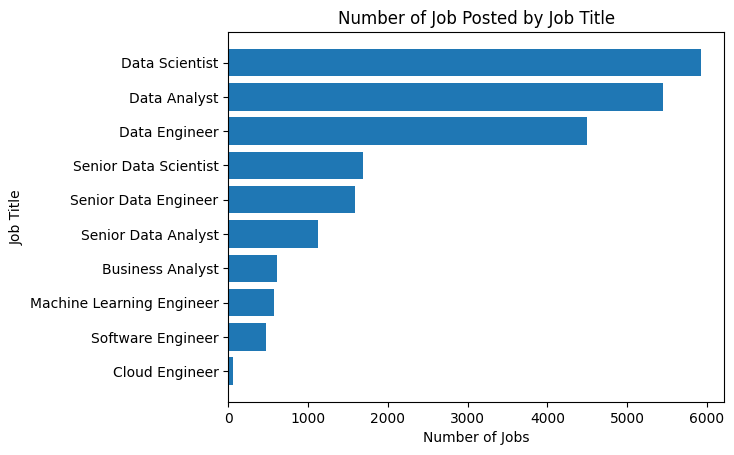

In [12]:
plt.barh(num_of_jobs.index, num_of_jobs)

plt.title("Number of Job Posted by Job Title")

plt.xlabel("Number of Jobs")

plt.ylabel("Job Title")

plt.show()

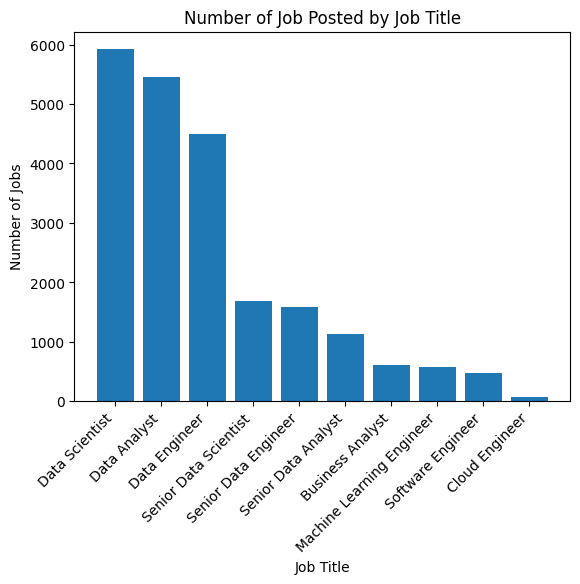

In [13]:
num_of_jobs_vertical = num_of_jobs.sort_values(ascending = False)

plt.bar(num_of_jobs_vertical.index, num_of_jobs_vertical)

plt.title("Number of Job Posted by Job Title")

plt.xticks(rotation = 45, ha = "right")

plt.xlabel("Job Title")

plt.ylabel("Number of Jobs")

plt.show()

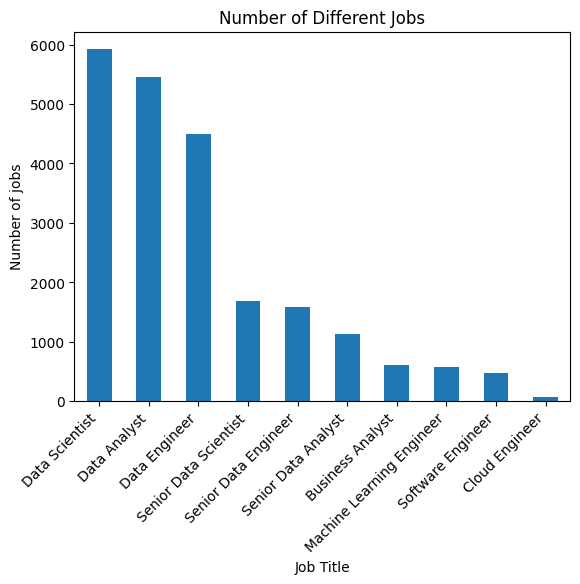

In [14]:
num_of_jobs_vertical.plot(kind = "bar")

plt.title("Number of Different Jobs")

plt.xticks(rotation = 45, ha = "right")

plt.xlabel("Job Title")

plt.ylabel("Number of jobs")

plt.show()

In [15]:
country_india_data = dataf[(dataf.job_location) == "India"]

country_india_data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"['java', 't-sql', 'sql', 'azure', 'power bi', ...","{'analyst_tools': ['power bi', 'dax'], 'async'...",10
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,157500.0,NaN,Silent Eight,"['python', 'sql', 'bash', 'postgresql', 'panda...","{'async': ['jira', 'confluence'], 'databases':...",7
16801,Senior Data Analyst,Senior Data Quality and Governance Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-11-29 13:11:16,False,False,India,year,64800.0,NaN,JLL,"['sql', 'visio', 'word', 'powerpoint']","{'analyst_tools': ['visio', 'word', 'powerpoin...",11
17032,Machine Learning Engineer,Machine Learning Engineer,India,via Ai-Jobs.net,Full-time,False,India,2023-10-24 13:11:14,False,False,India,year,155183.5,NaN,Deliveroo,"['aws', 'pytorch']","{'cloud': ['aws'], 'libraries': ['pytorch']}",10
28754,Senior Data Scientist,Senior Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-04 13:12:49,False,False,India,year,157500.0,NaN,Everstream Analytics,['excel'],{'analyst_tools': ['excel']},7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750926,Data Engineer,Data Engineer,India,via Ai-Jobs.net,Full-time,False,India,2023-06-06 20:10:02,False,False,India,year,147500.0,NaN,"Alation, Inc.",['excel'],{'analyst_tools': ['excel']},6
767406,Senior Data Scientist,Senior Analytics Engineer - Looker,India,via Ai-Jobs.net,Full-time,False,India,2023-08-31 01:16:42,True,False,India,year,147500.0,NaN,Deliveroo,"['sql', 'python', 'snowflake', 'bigquery', 're...","{'analyst_tools': ['looker'], 'cloud': ['snowf...",8
770804,Data Engineer,Data Engineer,India,via Ai-Jobs.net,Full-time,False,India,2023-12-15 01:10:31,False,False,India,year,155000.0,NaN,S&P Global,"['python', 'r', 'java', 'sql', 'nosql', 'hadoo...","{'analyst_tools': ['tableau'], 'libraries': ['...",12
772920,Data Engineer,Senior Associate Data Engineering L2 DE-Big Da...,India,via Ai-Jobs.net,Full-time,False,India,2023-02-14 01:28:41,True,False,India,year,96773.0,NaN,Publicis Groupe,"['java', 'scala', 'python', 'nosql', 'mongodb'...","{'cloud': ['aws', 'gcp', 'azure', 'redshift', ...",2


In [16]:
country_india_data[["job_title_short", "salary_year_avg"]]

,job_title_short,salary_year_avg
2022,Data Engineer,156500.0
16358,Data Scientist,157500.0
16801,Senior Data Analyst,64800.0
17032,Machine Learning Engineer,155183.5
28754,Senior Data Scientist,157500.0
...,...,...
750926,Data Engineer,147500.0
767406,Senior Data Scientist,147500.0
770804,Data Engineer,155000.0
772920,Data Engineer,96773.0


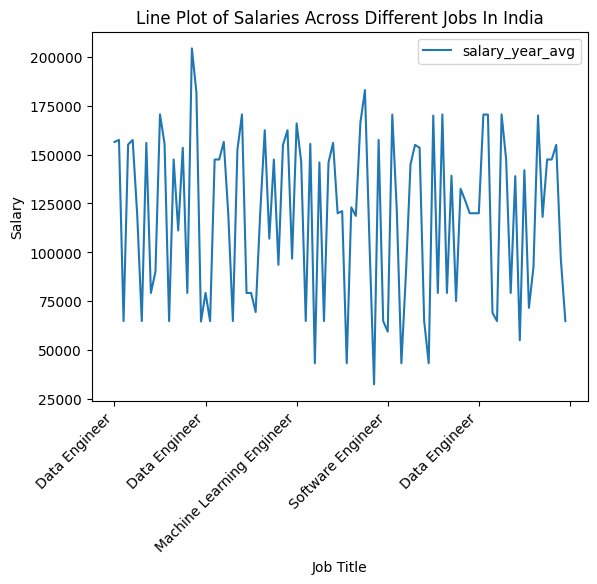

In [17]:
country_india_data.plot("job_title_short", "salary_year_avg", kind = "line")

plt.title("Line Plot of Salaries Across Different Jobs In India")

plt.xticks(rotation = 45, ha = "right")

plt.xlabel("Job Title")

plt.ylabel("Salary")

plt.show()